# 1. Motivation

_____________________________________________________________
* **What is your dataset?**
* **Why did you choose this/these particular dataset(s)?**
* **What was your goal for the end user's experience?**
______________________________________________________________
The dataset used in this analysis is called Case Data from San Francisco 311 (SF3111) - public service requests. It consists of complaints filed to the city of San Fransisco, in person, via phone, email, social media, or mobile applications. 

Customer Service Representatives log exactly when the case is opened an when it is resolved. The category of the complain is specified, which police district it belongs to, neighborhood, address, as well as the exact GPS coordinates. It includes more information too that does not relate to this analysis and will therefore not be discussed further. One of the complaint categories in the dataset is graffiti, which is further divided into graffiti on private and public properties. The analysis will focus on this attribute. 

* Size: 667.3 MB
* Number of rows: 353,318 rows
* Number of variables: 23 columns
* Latitude-longitude coordinates
* Detailed time log (down to the second) ranging from 2008-2017


One of the reasons why this dataset was considered is that its observations contain a detailed time log, it contains detailed geodata, as well as interesting categorical attributes. The dataset is also large enough for it to be reasonable to focus narrowly on specific categories and still have enough data to play with.

The goal is that the user will be able to view the distribution of graffiti accross the city and s/he should be able to see how it relates to other categories and attributes. The user should also be able to get a good feeling for how complaints regarding private and public property differ. The aim is to achieve a visual, interactive website.  

Furthermore, the model created here are intended to help the city of San Francisco improve its service level. The models should cover whether the city needs to up the service level anywhere, predict where new graffiti is likely to appear, and how long it takes to process complaints based on basic information.


# 2.  Basic stats

__________________
* **Write about your choices in data cleaning and preprocessing**
* **Write a short section that discusses the dataset stats**
__________________

To begin with the features that we use are extracted from the dataset and put into a pandas dataframe. The attributes that are extracted from the dataset and used for the analysis are the following:
* CaseID	
* Opened
* Closed	
* Updated Status	
* Category	
* Police District	
* Latitude	
* Longitude	 

Certain amount of preprocessing was needed for each of the different goals (graphs, tools, statistics) that we decided to do. The protocal that we followed was to copy the information needed for each model from the first dataframe (mentioned above), then extract the necessary information from there and perform calculations needed for the model in question. The preprocessing and calculations that are specific to each of the graphs/models are described at the beginning of each model and with comments throughout the model.


**Note:** The dataset was updated and new attributes added - we use the observations from the old dataset, merging the old and the new dataset on the ID of the old dataframe to gain the new information about the observations.

**Dataset stats:**

It is important to be able to get a feeling for the basic statistics of the dataset. Spotting trends and anomalies in the data can provide useful insights in terms of how the analysis should be carried out. The same goes for seeing how observations are distributed among categorical features etc. The rest of this section aims to communicate this information visually. The graphs that are created here will also be displayed on the website under basic statistics to give the user better oversight over the data that is used for the analysis.

The visualiztions that will be used to communicate the basic statistics information are the following:
* Graffiti Complaints as Time Series
* Average resolve times for by districts
* Correlation between graffiti cases and other categories
* Percentage of unresolved cases by district
* Total number of graffiti complaints by district

Averages and standard deviation will be quoted additionally as well where it is appropriate.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import pylab
import matplotlib.ticker as plticker
import seaborn as sns
import collections

# Read date column of file with panda
df = pd.read_csv("Case_Data_from_San_Francisco_311__SF311_.csv", usecols=[0,1,2,4,7,11,12,13])
print("DONE READING DATA")

# Read data again - Dataset was updated online halfway through the analysis with new interesting features we want to add
df_updated = pd.read_csv("_Notice_of_Dataset_Change__Case_Data_from_San_Francisco_311__SF311_.csv", usecols=[0,13])  #4=case opened/closed
# Merge with updated version of the dataset to add PD_district column
df_updated2 = pd.merge(df, df_updated, on='CaseID')
print("DONE MERGING")

DONE READING DATA
DONE MERGING


## Plot Graffiti Complaints as Time Series

DONE PROCESSING - START PLOTTING PROCEDURE


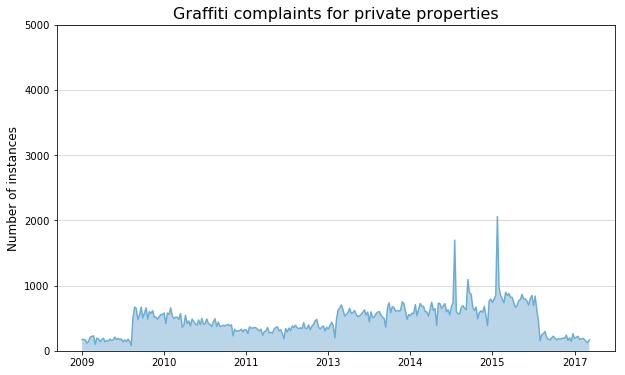

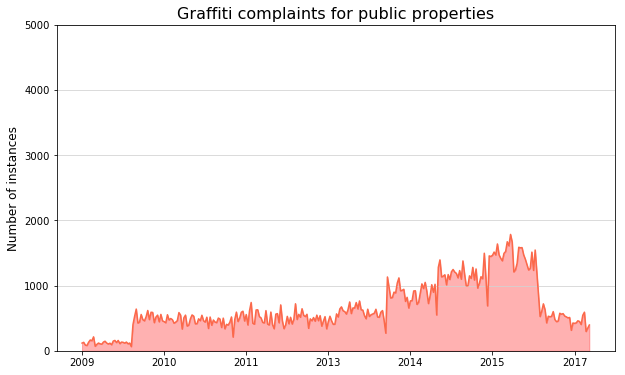

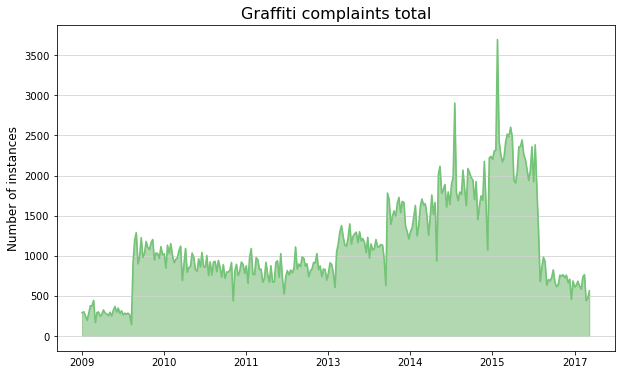

The mean number number of complaints:  1131.17741935
The mean number number of complaints relateting to private property graffiti:  469.403225806
The mean number number of complaints relateting to public property graffiti:  661.774193548
The std for number of complaints:  585.418767241
The std for number number of complaints relateting to private property graffiti:  235.002008205
The std for number number of complaints relateting to private property graffiti:  382.050402829


In [37]:
df2 = df_updated2.copy()

# Show month and year
df2['Opened'] = df2['Opened'].str[6:10].map(str) + '-' + df2['Opened'].str[3:5].map(str)

# Only use graffiti from Category
df_public  = df2[(df2.Category == 'Graffiti Public Property' )]
df_private = df2[(df2.Category == 'Graffiti Private Property')]

# Count the number in all Categories
df_public  = df_public.groupby( ['Category','Opened']).size().reset_index(name="Frequency")
df_private = df_private.groupby(['Category','Opened']).size().reset_index(name="Frequency")

# Count public
grafFreqList_public = map(int, list(df_public.Frequency))
grafDateList_public = list(df_public.Opened)

# Count private
grafFreqList_private = map(int, list(df_private.Frequency))
grafDateList_private = list(df_private.Opened)

# Count total public and private
grafFreqList_total = []
grafFreqList_total = [grafFreqList_private[i] + grafFreqList_public[i] for i in range(len(grafFreqList_private))]
my_xticks = [date[0:4] for date in grafDateList_public[0::40]]

print("DONE PROCESSING - START PLOTTING PROCEDURE")

#private
blue, = sns.color_palette("Blues", 1)
x = range(0,len(grafFreqList_private))
y = grafFreqList_private

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color=blue)
ax.fill_between(x, 0, y, alpha=.3)
plt.xticks(x, my_xticks)
loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
#ax.xaxis.grid(color='lightgray')
ax.yaxis.grid(color='lightgray')
ax.patch.set_facecolor('none')
plt.ylabel('Number of instances', fontsize=12)
plt.title('Graffiti complaints for private properties', fontsize=16)
plt.ylim((0,5000))
plt.show()


#public
red, = sns.color_palette("Reds", 1)
x = range(0,len(grafFreqList_public))
y = grafFreqList_public

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color=red)
ax.fill_between(x, 0, y, alpha=.3, color='r')
plt.xticks(x, my_xticks)
loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
#ax.xaxis.grid(color='lightgray')
ax.yaxis.grid(color='lightgray')
plt.ylabel('Number of instances', fontsize=12)
ax.patch.set_facecolor('none')
plt.title('Graffiti complaints for public properties', fontsize=16)
plt.ylim((0,5000))
plt.show()


#total
green, = sns.color_palette("Greens", 1)
x = range(0,len(grafFreqList_total))
y = grafFreqList_total

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color=green)
ax.fill_between(x, 0, y, alpha=.3, color='g')
my_xticks = [date[0:4] for date in grafDateList_public[0::40]]
plt.xticks(x, my_xticks)
loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
#ax.xaxis.grid(color='lightgray')
ax.yaxis.grid(color='lightgray')
ax.patch.set_facecolor('none')
plt.ylabel('Number of instances', fontsize=12)
plt.title('Graffiti complaints total', fontsize=16)
plt.show()

# Print basic statistics for the ratio graphs
print "The mean number number of complaints: ", np.mean(grafFreqList_total)
print "The mean number number of complaints relateting to private property graffiti: ", np.mean(grafFreqList_private)
print "The mean number number of complaints relateting to public property graffiti: ", np.mean(grafFreqList_public)

print "The std for number of complaints: ", np.std(grafFreqList_total)
print "The std for number number of complaints relateting to private property graffiti: ", np.std(grafFreqList_private)
print "The std for number number of complaints relateting to private property graffiti: ", np.std(grafFreqList_public)

**Comment on the time series**

There's clearly an upward trend in the data overall. It however appears to reach an all time high in 2015 and drop rapidly after that.

## Plot average resolve times for PD districts

Here we extract and process data to be able to calculate the average time it takes to resolve complaints in different police districts. The resolve time is calculated as the time difference bewteen when the case was opened and when it is closed. Unresolved cases are left out. The results are then displayed in the form of barplots, distinguishing between graffiti on private and public property.

DONE CREATING NEW COLUMNS
DONE PREPROCESSING PART 1
DONE PREPROCESSING PART 2 - NOW START PLOTTING PROCESS


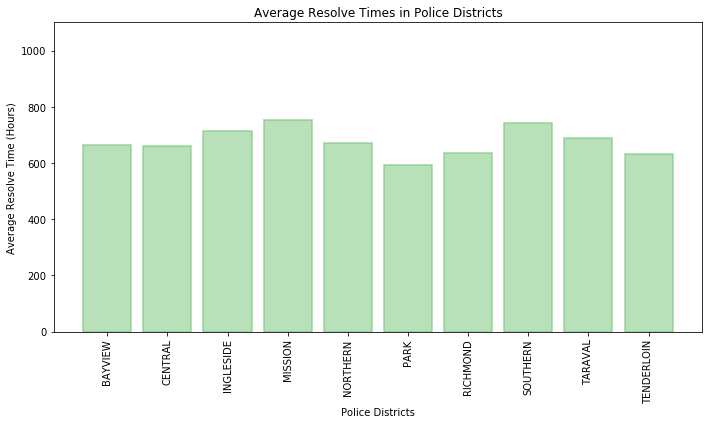

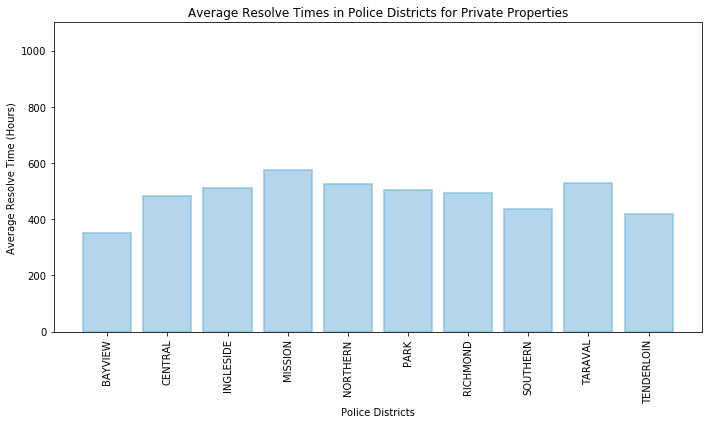

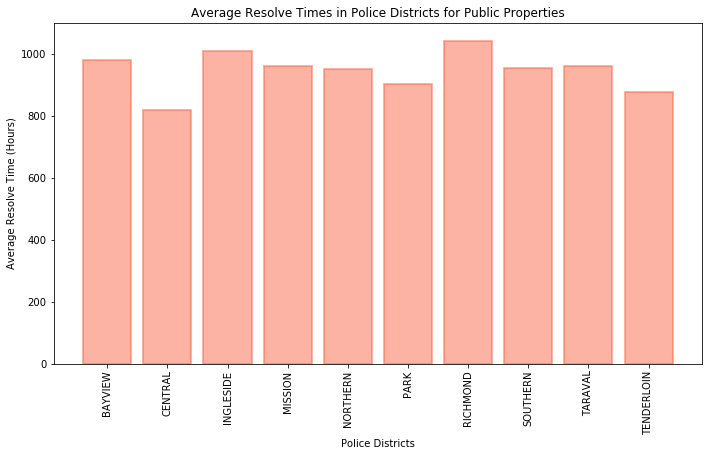

The mean resolve time for all districts:  675.950368588
The mean resolve time for all districts, private property graffiti cases:  482.345543721
The mean resolve time for all districts, public property graffiti cases:  946.300506353
The std for average resolve times for all graffiti cases:  48.1921769892
The std for average resolve times for private property graffiti cases:  61.605077208
The std for average resolve times for public property graffiti cases:  61.5166544359


In [57]:
import datetime
from collections import Counter
import collections
import seaborn.apionly as sns

df2 = df_updated2.copy()

# Don't use unresolved cases here
df2  = df2[(df2.Status == 'Closed' )] 

# Only use graffiti
df2  = df2[(df2.Category == 'Graffiti Public Property') | (df2.Category == 'Graffiti Private Property' )]

# Extract time information from df2
df2['monthOpened']= df2['Opened'].str[0:2].astype(int)
df2['dayOpened']  = df2['Opened'].str[3:5].astype(int)
df2['yearOpened'] = df2['Opened'].str[6:10].astype(int)
df2['hourOpened'] = df2['Opened'].str[11:13].astype(int)
df2['ampmOpened'] = df2['Opened'].str[20:22]

df2['monthClosed']= df2['Closed'].str[0:2].astype(int)
df2['dayClosed']  = df2['Closed'].str[3:5].astype(int)
df2['yearClosed'] = df2['Closed'].str[6:10].astype(int)
df2['hourClosed'] = df2['Closed'].str[11:13].astype(int)
df2['ampmClosed'] = df2['Opened'].str[20:22]

# Fix the date format for the diff formula
df2.ix[df2.ampmOpened == 'PM', 'hourOpened'] = df2.hourOpened + 12
df2.ix[df2.ampmClosed == 'PM', 'hourClosed'] = df2.hourClosed + 12

df2.ix[df2.hourOpened == 24, 'hourOpened'] = 0
df2.ix[df2.hourClosed == 24, 'hourClosed'] = 0

print("DONE CREATING NEW COLUMNS")

#Calculate time it takes to resolve cases that have been closed (diff between Opened and Closed times)
hourOpenedList = list(df2.hourOpened)
dayOpenedList = list(df2.dayOpened)
monthOpenedList = list(df2.monthOpened)
yearOpenedList = list(df2.yearOpened)

hourClosedList = list(df2.hourClosed)
dayClosedList = list(df2.dayClosed)
monthClosedList = list(df2.monthClosed)
yearClosedList = list(df2.yearClosed)

resolveTime = []

for i in range (len(df2.hourOpened)):
    start = datetime.datetime(year=yearOpenedList[i], month=monthOpenedList[i], day=dayOpenedList[i], hour=hourOpenedList[i])
    end = datetime.datetime(year=yearClosedList[i], month=monthClosedList[i], day=dayClosedList[i], hour=hourClosedList[i]) 
    diff = end - start
    diff
    datetime.timedelta(0, 32400)
    diff.total_seconds()
    resolveTime.append(diff.total_seconds() / 60 / 60) #time in hours

    # Put the result into our df
df2['ResolveTime'] = resolveTime

# Fix the date format for the diff formula
df2.ix[df2.ResolveTime < 0, 'ResolveTime'] = df2.ResolveTime + 24  #because 00 means 24
df2 = df2[df2.ResolveTime >= 0]

print("DONE PREPROCESSING PART 1")

averageResolveTimes = []
averageResolveTimes_Private = []
averageResolveTimes_Public = []
pdDistricts = df2['Police District'].unique()

for i in pdDistricts:
    # TOTAL
    temp_df = df2[df2['Police District'] == i]
    temp_resolveTimeList = temp_df["ResolveTime"].tolist()
    averageResolveTimes.append(np.mean(temp_resolveTimeList))
    # PRIVATE
    temp_df_Private = df2[(df2['Police District'] == i) & (df2['Category'] == 'Graffiti Private Property')]
    temp_resolveTimeList_Private = temp_df_Private["ResolveTime"].tolist()
    averageResolveTimes_Private.append(np.mean(temp_resolveTimeList_Private))
    # PUBLIC
    temp_df_Public = df2[(df2['Police District'] == i) & (df2['Category'] == 'Graffiti Public Property')]
    temp_resolveTimeList_Public = temp_df_Public["ResolveTime"].tolist()
    averageResolveTimes_Public.append(np.mean(temp_resolveTimeList_Public))

print("DONE PREPROCESSING PART 2 - NOW START PLOTTING PROCESS")

#Plot average resolve times for PD districts
dicTotal = dict(zip(pdDistricts[0:10], averageResolveTimes[0:10]))
dicPublic = dict(zip(pdDistricts[0:10], averageResolveTimes_Private[0:10]))
dicPrivate = dict(zip(pdDistricts[0:10], averageResolveTimes_Public[0:10]))

dicPrivate = collections.OrderedDict(sorted(dicPrivate.items()))
dicPublic = collections.OrderedDict(sorted(dicPublic.items()))
dicTotal = collections.OrderedDict(sorted(dicTotal.items()))

def makeListsFromDict(dic):
    val = [value for key, value in dic.items()]
    keys = [key for key in dic]
    return keys, val

keyPrivate, valPrivate =  makeListsFromDict(dicPrivate)
keyPublic, valPublic =  makeListsFromDict(dicPublic)
keyTotal, valTotal =  makeListsFromDict(dicTotal)

#Color Schemes
greens = sns.color_palette('Greens', 1)
greens.as_hex()
blues = sns.color_palette('Blues', 1)
blues.as_hex()
reds = sns.color_palette('Reds', 1)
reds.as_hex()


#BOTH_________________________________________
n_groups = 10
 
# create plot
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(n_groups)
bar_width = 0.6
opacity = 0.5

rects1 = plt.bar(index, valTotal[0:10],
                 alpha=opacity,
                 color=greens,
                 edgecolor=greens,
                 linewidth = 2) 
plt.xlabel('Police Districts')
plt.ylabel('Average Resolve Time (Hours)')
plt.title('Average Resolve Times in Police Districts')
plt.xticks(index, keyTotal[0:10],rotation=90)
plt.ylim((0,1100))

plt.tight_layout()
plt.savefig("b1.png",bbox_inches='tight')
plt.show()


#PRIVATE_________________________________________
# create plot
fig, ax = plt.subplots(figsize=(10, 6))
#fig.set_size_inches(14, 8)
index = np.arange(n_groups)
bar_width = 0.6
opacity = 0.5

rects2 = plt.bar(index, valPrivate[0:10],
                 alpha=opacity,
                 color=blues,
                 edgecolor=blues,
                 linewidth = 2)
plt.xlabel('Police Districts')
plt.ylabel('Average Resolve Time (Hours)')
plt.title('Average Resolve Times in Police Districts for Private Properties')
plt.xticks(index, keyPrivate[0:10],rotation=90)
#plt.ylim((0,1100))
plt.ylim((0,1100))
#plt.axis([0, len(index), 0, 1100])
#plt.
plt.tight_layout()

plt.savefig("b2.png",bbox_inches='tight')
plt.show()

#PUBLIC__________________________________________
# create plot
fig, ax = plt.subplots(figsize=(10, 6))
#fig.set_size_inches(14, 8)
index = np.arange(n_groups)
bar_width = 0.6
opacity = 0.5

rects3 = plt.bar(index, valPublic[0:10],
                 alpha=opacity,
                 color=reds,
                 edgecolor=reds,
                 linewidth = 2)
plt.xlabel('Police Districts')
plt.ylabel('Average Resolve Time (Hours)')
plt.title('Average Resolve Times in Police Districts for Public Properties')
plt.xticks(index, keyPublic[0:10],rotation=90)
plt.ylim((0,1100))
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("b3.png",bbox_inches='tight')
plt.show()


# Print basic statistics for the ratio graphs
print "The mean resolve time for all districts: ", np.mean(valTotal[0:10])
print "The mean resolve time for all districts, private property graffiti cases: ", np.mean(valPrivate[0:10])
print "The mean resolve time for all districts, public property graffiti cases: ", np.mean(valPublic[0:10])

print "The std for average resolve times for all graffiti cases: ", np.std(valTotal[0:10])
print "The std for average resolve times for private property graffiti cases: ", np.std(valPrivate[0:10])
print "The std for average resolve times for public property graffiti cases: ", np.std(valPublic[0:10])

**Comments on average resolve times by district**

There does not appear to be a significant difference in average resolve times between districts. We therefore do not have any evidence that there is a difference in service level between the districts. Interestingly however, the variance in resolve time is quite large.

## Plot correlation between graffiti cases and other categories

Here we calculate the correlation between graffiti complaints and other complaints in the dataset (for example 'Noise Complaints', 'Abandoned Vehicle', etc...). We of course realize that correlation doesn't necessarily imply causation, but it's interesting to see whether there is a connection between graffiti and other problems in San Francisco.

[-0.16474506648690482, 0.77282704970093019, 0.21723132416790542, 0.52753245936038473, 0.54521697325606056, 0.0026826148057586168, 0.50008788234122625, 0.5725747523318121, 0.41445435230263566, 0.075223855316446583, 0.11945086601084307, 0.56712215430484325, 0.30987745925772658, 0.71400957629716388, -0.013988568329162754, 0.43593790601709265]


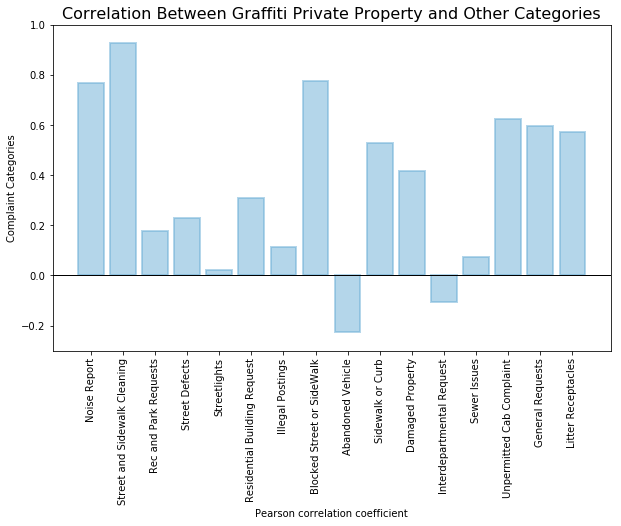

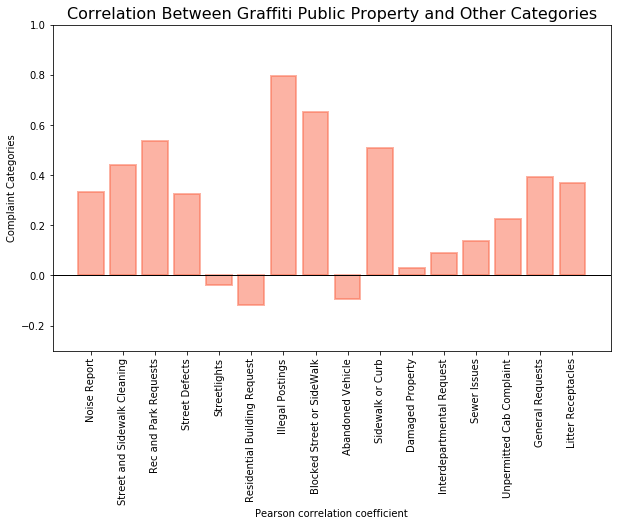

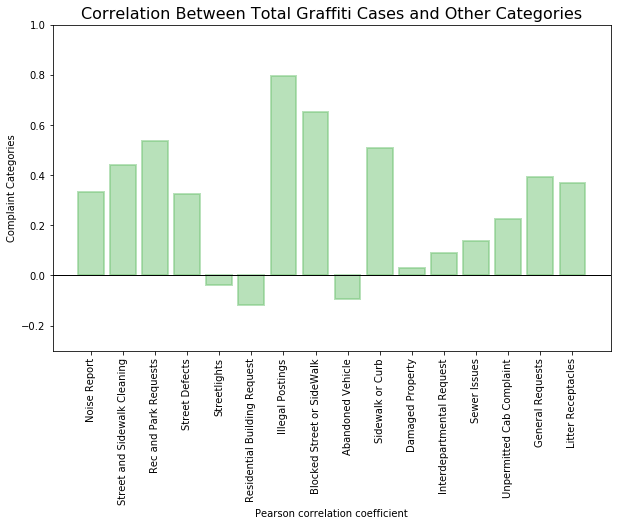

The max/min correlation of open graffiti cases:  [-0.16474506648690482, 0.77282704970093019]
The max/min correlation of open private property graffiti cases:  [-0.22517805289001172, 0.9266366666972542]
The max/min correlation of open public property graffiti cases:  [-0.11725273155920828, 0.79512015158934313]


In [60]:
df2 = df_updated2.copy()

# Count the number in all Categories
allCategoriesFreq  = df2.groupby(['Category','Police District']).size().reset_index(name="Frequency")

#allCategoriesFreq
allCategoriesFreq[allCategoriesFreq['Category'] == 'DPW Volunteer Programs']

pdDistrictsList = ['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN']

corrPrivateList = []

for i in pdDistricts:
    tempFreqDF = allCategoriesFreq[(allCategoriesFreq['Police District'] == i) & (allCategoriesFreq['Category'] == 'Abandoned Vehicle')]
    tempFreqDF_graf = allCategoriesFreq[(allCategoriesFreq['Police District'] == i) & (allCategoriesFreq['Category'] == 'Graffiti Private Property')]
    tempFreqList = tempFreqDF['Frequency'].tolist()
    tempFreqList_graf = tempFreqDF_graf['Frequency'].tolist()
corr = np.corrcoef(tempFreqList,tempFreqList_graf)


grafPrivateFreqList = allCategoriesFreq[(allCategoriesFreq['Category'] == 'Graffiti Private Property')]['Frequency'].tolist()
grafPublicFreqList = allCategoriesFreq[(allCategoriesFreq['Category'] == 'Graffiti Public Property')]['Frequency'].tolist()
grafTotalFreqList = [sum(x) for x in zip(grafPrivateFreqList, grafPublicFreqList)]

corrPrivateList = []
corrPublicList = []
corrTotalList = []

#New df without graffiti private and public - also remove uninteresting categories
allCategoriesFreq_noGraffiti = allCategoriesFreq[(allCategoriesFreq['Category'] != 'Graffiti Private Property')
                                                 &(allCategoriesFreq['Category'] != 'Graffiti Public Property')
                                                 &(allCategoriesFreq['Category'] != 'Construction Zone Permits')
                                                 &(allCategoriesFreq['Category'] != 'DPW Volunteer Programs')
                                                 &(allCategoriesFreq['Category'] != 'Catch Basin Maintenance')
                                                 &(allCategoriesFreq['Category'] != 'Color Curb')
                                                 &(allCategoriesFreq['Category'] != 'MUNI Feedback')
                                                 &(allCategoriesFreq['Category'] != 'Tree Maintenance')
                                                 &(allCategoriesFreq['Category'] != 'Sign Repair')
                                                 &(allCategoriesFreq['Category'] != 'Temporary Sign Request')
                                                 &(allCategoriesFreq['Category'] != '311 External Request')
                                                 &(allCategoriesFreq['Category'] != 'General Request')
                                                 &(allCategoriesFreq['Category'] != 'SFHA Requests')]


listOfAllCategoryNames = list(allCategoriesFreq_noGraffiti.Category.unique())

for i in listOfAllCategoryNames:
    #External Requests frequency list
    tempCategoryFreqList = allCategoriesFreq_noGraffiti[(allCategoriesFreq_noGraffiti['Police District'] != '8TH CONGRESSIONAL DISTRICT') & (allCategoriesFreq_noGraffiti['Category'] == i)]['Frequency'].tolist()
    corrPrivateList.append(np.corrcoef(tempCategoryFreqList,grafPrivateFreqList)[0,1])
    corrPublicList.append(np.corrcoef(tempCategoryFreqList,grafPublicFreqList)[0,1])
    corrTotalList.append(np.corrcoef(tempCategoryFreqList,grafTotalFreqList)[0,1])
print(corrTotalList)

dicPrivate = dict(zip(listOfAllCategoryNames, corrPrivateList))
dicPublic = dict(zip(listOfAllCategoryNames, corrPublicList))
dicTotal = dict(zip(listOfAllCategoryNames, corrPublicList))

import seaborn.apionly as sns

def barPlotCases(dictonary, title, xlab, ylab, col, figName,y_lowlim, y_uplim,filename):
    # the input needs to be sorted ordered dictonary
    values = [value for key, value in dictonary.items()]
    keys = [key for key in dictonary]
    xAxis = range(len(values))
    fig = plt.figure(figsize=(10, 6))
    plt.bar(xAxis, values, color = col, alpha = 0.5, edgecolor = col, linewidth = 2)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(title, fontsize = 16)
    plt.xticks(xAxis, keys, rotation = 90)
    plt.tick_params(axis='y')
    plt.tick_params(axis='x')
    plt.ylim((y_lowlim,y_uplim))
    plt.axhline(linewidth=1, color='k')
    plt.savefig(filename,bbox_inches='tight')
    plt.show()

# Color Schemes
greens = sns.color_palette('Greens', 1)
greens.as_hex()
blues = sns.color_palette('Blues', 1)
blues.as_hex()
reds = sns.color_palette('Reds', 1)
reds.as_hex()

# Call plot function to plot
barPlotCases(dicPrivate, "Correlation Between Graffiti Private Property and Other Categories",
             "Pearson correlation coefficient","Complaint Categories", blues, 'privateCorr.png',-0.3,1,"c2.png")
barPlotCases(dicPublic, "Correlation Between Graffiti Public Property and Other Categories",
             "Pearson correlation coefficient","Complaint Categories",reds, 'publicCorr.png',-0.3,1,"c3.png")
barPlotCases(dicTotal, "Correlation Between Total Graffiti Cases and Other Categories",
             "Pearson correlation coefficient","Complaint Categories",greens, 'publicCorr.png',-0.3,1,"c1.png")


# Print basic statistics for the ratio graphs
print "The max/min correlation of open graffiti cases: ", [np.min(corrTotalList),np.max(corrTotalList)]
print "The max/min correlation of open private property graffiti cases: ", [np.min(corrPrivateList),np.max(corrPrivateList)]
print "The max/min correlation of open public property graffiti cases: ", [np.min(corrPublicList),np.max(corrPublicList)]

**Comments on correlation between graffiti and other categories**

The correlations appear high/low for similar categories both for private and public property complaints. Private property complaints seem to correlate more to noise reports and sidewalk cleaning. Public property complaints correlate more to illegal postings. The strongest negative correlation appears to be with abandoned vehicles. 

The following links to graffiti may be interesting to explore:
* Noise reports
* Street and sidewalk cleaning
* Illegal postings
* Blocked street or sidewalk

## Plot Percentage of unresolved cases in each district

Percentage of unresolved cases is simply calculated as the ratio of unresolved cases to total amount of cases, both in a given district

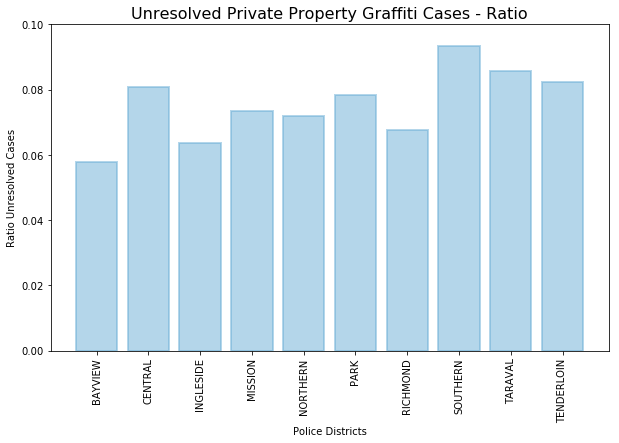

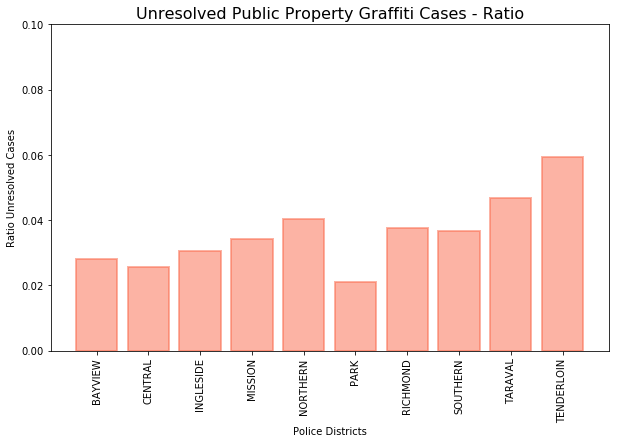

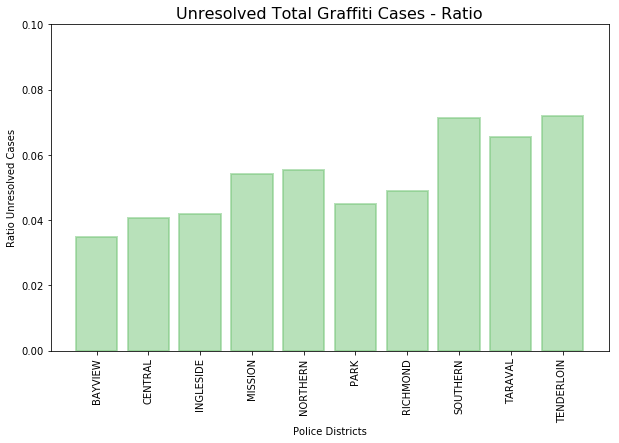

The mean % of open graffiti cases:  0.0529242464584 %
The mean % of open private property graffiti cases:  0.075495896123 %
The mean % of open public property graffiti cases:  0.0360080042215 %
The std of open graffiti cases:  0.0123655273715
The std of open private property graffiti cases:  0.010188713443
The std of open public property graffiti cases:  0.0105342051965


In [43]:
df4 = df_updated2.copy()

df4  = df4[(df4.Category == 'Graffiti Public Property') | (df4.Category == 'Graffiti Private Property' )]

# Count the number in all Categories
df_statusFreq = df4.groupby( ['Status','Police District','Category']).size().reset_index(name="Frequency")
# Skip 8th congressional district as usual - not interesting
df_statusFreq = df_statusFreq[(df_statusFreq['Police District'] != '8TH CONGRESSIONAL DISTRICT')]

pdDistrictsList = ['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN']

openRatioListPrivate = []
openRatioListPublic  = []
openRatioListTotal   = []

for i in pdDistrictsList:
    #Private - calculate ratio open graffiti cases
    tempOpenPrivate   = float(str(df_statusFreq[(df_statusFreq['Police District'] == i) & (df_statusFreq['Status'] == 'Open')  & (df_statusFreq['Category'] == 'Graffiti Private Property')]['Frequency'].tolist()[0]))
    tempClosedPrivate = float(str(df_statusFreq[(df_statusFreq['Police District'] == i) & (df_statusFreq['Status'] == 'Closed')& (df_statusFreq['Category'] == 'Graffiti Private Property')]['Frequency'].tolist()[0]))
    openRatioListPrivate.append(tempOpenPrivate/(tempOpenPrivate+tempClosedPrivate))
    #Public - calculate ratio open graffiti cases
    tempOpenPublic    = float(str(df_statusFreq[(df_statusFreq['Police District'] == i) & (df_statusFreq['Status'] == 'Open')  & (df_statusFreq['Category'] == 'Graffiti Public Property')]['Frequency'].tolist()[0]))
    tempClosedPublic  = float(str(df_statusFreq[(df_statusFreq['Police District'] == i) & (df_statusFreq['Status'] == 'Closed')& (df_statusFreq['Category'] == 'Graffiti Public Property')]['Frequency'].tolist()[0]))
    openRatioListPublic.append(tempOpenPublic/(tempOpenPublic+tempClosedPublic))
    #Total - calculate ratio open graffiti cases
    openRatioListTotal.append((tempOpenPrivate+tempOpenPublic)/(tempOpenPrivate+tempOpenPublic+tempClosedPrivate+tempClosedPublic))

# Sort the bars in alphabetical order
dicPrivate = dict(zip(pdDistricts[0:10], openRatioListPrivate[0:10]))
dicPublic  = dict(zip(pdDistricts[0:10], openRatioListPublic[0:10]))
dicTotal   = dict(zip(pdDistricts[0:10], openRatioListTotal[0:10]))

dicPrivate = collections.OrderedDict(sorted(dicPrivate.items()))
dicPublic  = collections.OrderedDict(sorted(dicPublic.items()))
dicTotal   = collections.OrderedDict(sorted(dicTotal.items()))

barPlotCases(dicPrivate, "Unresolved Private Property Graffiti Cases - Ratio", "Police Districts", "Ratio Unresolved Cases", blues, 'publicCorr.png',0,0.1,"d2.png")
barPlotCases(dicPublic, "Unresolved Public Property Graffiti Cases - Ratio", "Police Districts", "Ratio Unresolved Cases",  reds, 'publicCorr.png',0,0.1,"d3.png")
barPlotCases(dicTotal, "Unresolved Total Graffiti Cases - Ratio", "Police Districts", "Ratio Unresolved Cases",  greens, 'publicCorr.png',0,0.1,"d1.png")

# Print basic statistics for the ratio graphs
print "The mean % of open graffiti cases: ", np.mean(openRatioListTotal),"%"
print "The mean % of open private property graffiti cases: ", np.mean(openRatioListPrivate),"%"
print "The mean % of open public property graffiti cases: ", np.mean(openRatioListPublic),"%"

print "The std of open graffiti cases: ", np.std(openRatioListTotal)
print "The std of open private property graffiti cases: ", np.std(openRatioListPrivate)
print "The std of open public property graffiti cases: ", np.std(openRatioListPublic)

**Comments**

There is clearly higher percentage of private property complaints that is unresolved. The follwing police districts appear to have the highest percentage of unresolved cases:

* Southern
* Taraval
* Tenderloin

## Plot total number of graffiti complaints in each district

The number of graftiti on private property is 205150, public proberty i 145515 and total 350665
{'CENTRAL': 17418, 'NORTHERN': 29785, 'INGLESIDE': 15063, 'PARK': 34986, 'MISSION': 43797, 'TENDERLOIN': 6866, 'RICHMOND': 25239, 'TARAVAL': 13437, 'BAYVIEW': 8452, 'SOUTHERN': 9734}


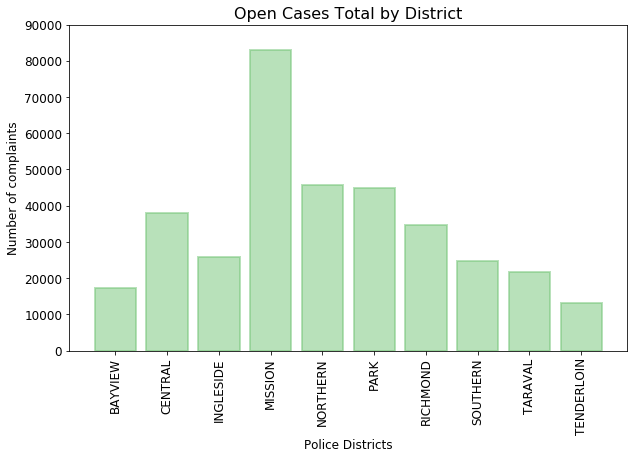

the average count of opend cases in a neighbourhood for the Open Cases Total by District is: 34904.90 
the variance is 366752343.89
the std is 19150.78


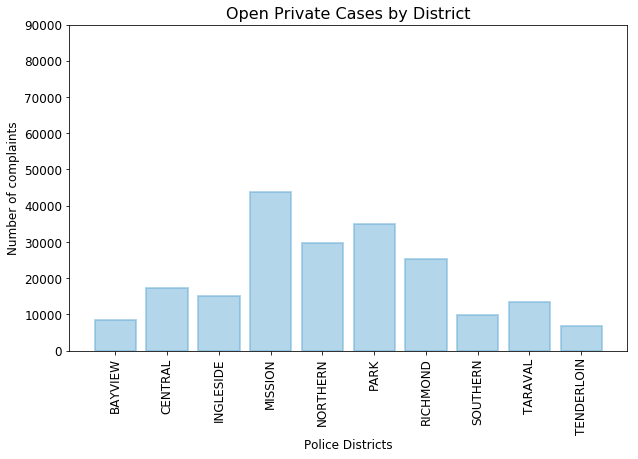

the average count of opend cases in a neighbourhood for the Open Private Cases by District is: 20477.70 
the variance is 139715145.61
the std is 11820.12


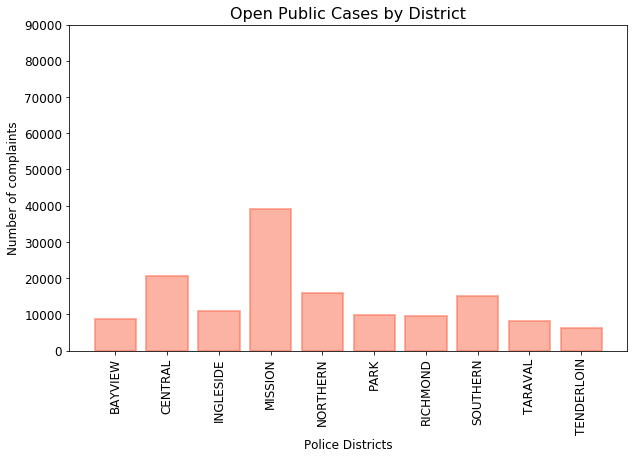

the average count of opend cases in a neighbourhood for the Open Public Cases by District is: 14427.20 
the variance is 83970966.36
the std is 9163.57
csv file totalInstaceInDistict.csv made, and saved in the current working directory!
DONE


In [59]:
from collections import defaultdict # the fastest way to add dictionary values together

df4 = df_updated2.copy()
privateProb = df4.loc[df4['Category'] == 'Graffiti Public Property']
publicProb = df4.loc[df4['Category'] == 'Graffiti Private Property']

totalGrafiti = len(privateProb.Category) + len(publicProb.Category)

print "The number of graftiti on private property is %d, public proberty i %d and total %d"%(len(privateProb.Category),len(publicProb.Category),totalGrafiti)

# get the data for private and public
instancesOfPrivateGrafiti = privateProb['Police District'].value_counts()
instancesOfPublicGrafiti = publicProb['Police District'].value_counts()

#store in dictionarys
instancesOfPrivateGrafiti = dict(instancesOfPrivateGrafiti)
instancesOfPublicGrafiti = dict(instancesOfPublicGrafiti)

print instancesOfPrivateGrafiti


instanceOfAllGrafiti = defaultdict(int)
ds = [instancesOfPrivateGrafiti, instancesOfPublicGrafiti]
for d in ds:
    for k, v in d.items():
        instanceOfAllGrafiti[k] += v

# we will sort the dictonary accodring to key (neighbourhood) but dicts dont rember order so
# we introduce a new datastructure
instancesOfPrivateGrafiti = collections.OrderedDict(sorted(instancesOfPrivateGrafiti.items()))
instancesOfPublicGrafiti = collections.OrderedDict(sorted(instancesOfPublicGrafiti.items()))
instanceOfAllGrafiti = collections.OrderedDict(sorted(instanceOfAllGrafiti.items()))



def barPlotCases(dictonary, title, col, figName, filename):
    # the input needs to be sorted ordered dictonary
    values = [value for key, value in dictonary.items()]
    keys = [key for key in dictonary]
    xAxis = range(len(values))
    fig = plt.figure(figsize=(10, 6))
    plt.bar(xAxis, values, color = col, alpha = 0.5, edgecolor = col, linewidth = 2)
    plt.ylabel("Number of complaints", fontsize = 12)
    plt.xlabel("Police Districts", fontsize = 12)    
    plt.title(title, fontsize = 16)
    
    plt.xticks(xAxis, keys, rotation = 90)
    plt.tick_params(axis='y',labelsize=12)
    plt.tick_params(axis='x',labelsize=12)
    plt.ylim((0,90000))
    plt.savefig(filename,bbox_inches='tight')
    plt.show()
    
    print "the average count of opend cases in a neighbourhood for the " + title + " is: %.2f " %np.average(values)
    print "the variance is %.2f" % np.var(values)
    print "the std is %.2f" % np.std(values)
    
greens = sns.color_palette('Greens', 1)
greens.as_hex()


blues = sns.color_palette('Blues', 1)
blues.as_hex()

reds = sns.color_palette('Reds', 1)
reds.as_hex()
    
barPlotCases(instanceOfAllGrafiti, "Open Cases Total by District",greens, 'allCountsNeigh.png','e3')
barPlotCases(instancesOfPrivateGrafiti, "Open Private Cases by District", blues, 'privateCountsNeigh.png','e1')
barPlotCases(instancesOfPublicGrafiti, "Open Public Cases by District", reds, 'PublicCountsNeigh.png','e2')

if len(instanceOfAllGrafiti) == len(instancesOfPrivateGrafiti) & len(instanceOfAllGrafiti) == len(instancesOfPublicGrafiti):
    # since they have the same length and they are sorted so they definatly contain the same elements
    # it was also checked manualy smilyface.. since ofc they could have diffrent elements.. but if allGraftiri is the same
    # as the others then ofc they all contain the same values
    graffities = {
            'district' :[key for key in instanceOfAllGrafiti] ,
            'public': [value for key, value in instancesOfPublicGrafiti.items()],
            'private': [value for key, value in instancesOfPrivateGrafiti.items()]
        }        

    predict_data = pd.DataFrame(graffities)
    predict_data.to_csv("totalInstaceInDistict.csv")
    print "csv file totalInstaceInDistict.csv made, and saved in the current working directory!"

print "DONE"

**Comments**

Mission clearly has the most complaints, followed by Northern and Park. The private property complaints are distributed more equally throughout the different districts than the public property complaints.

## Interactive barplot 

We created an interactive d3 barplot that is displayed on the website. This is the pre-preprocessing that was done in Python for this plot. The information is saved to a json file which is then used for the website.

In [63]:
pf = df_updated2.copy()

data = {} # everything will be put in this dict at the end and then put to a json
data2 = []
time = {} # too keep track of all the time values
hours =["01 O' clock", "02 O' clock", "03 O' clock", "04 O' clock", "05 O' clock", "06 O' clock",
        "07 O' clock", "08 O' clock", "09 O' clock", "10 O' clock", "11 O' clock", "12 O' clock", "13 O' clock",
        "14 O' clock", "15 O' clock", "16 O' clock", "17 O' clock", "18 O' clock", "19 O' clock", "20 O' clock",
        "21 O' clock", "22 O' clock", "23 O' clock", "24 O' clock"] # to ensure that we have data for every hour
catego = ['Graffiti Public Property', 'Graffiti Private Property', 'both']
for elem in catego:
    if(elem == 'both'):
        graffiti = pf[(pf['Category'] == 'Graffiti Public Property') | (pf['Category'] == 'Graffiti Private Property') ]
    else:
        graffiti = pf[(pf['Category'] == elem)]
    districts = set(filter(lambda x: x == x , graffiti['Police District'])) # we use filter to prevent having nan values
    all_district_grafiti_count = []
    clock = [] # time around the hour around
    for district in districts:
        graffiti_district = graffiti[(graffiti['Police District'] == district)]
        graffiti_district['Opened'] = graffiti_district['Opened'].apply(lambda x: x[11:13] if x[20:22] == "AM" else str(int(x[11:13])+12)) # slice the time
        graffiti_district = graffiti_district['Opened'].value_counts()
        graffiti_district = dict(graffiti_district)
        graffiti_district = collections.OrderedDict(sorted(graffiti_district.items()))
        all_district_grafiti_count.append([value for key, value in graffiti_district.items()])
        clock.append([key + ":00" for key in graffiti_district])

    # this is to ensure that if the district has no graffiti
    #in some hour we add zero to that hour
    i = 0
    for district_hours in clock:
        if len(district_hours) != len(hours):
            print "eoe"
            k = 0
            for hour in hours:
                if hour != district_hours[k]:
                    district_hours.insert(k, hour)
                    all_district_grafiti_count[i].insert(k, 0)
                k = k+1
        i = i+1
                
    #by using dict, we make a copy so we dont have referance problems    
    data[elem] = dict(zip(districts,all_district_grafiti_count)) 
    time[elem] = dict(zip(districts,clock)) 
#print data

dk = pd.DataFrame([data, time])
dk.to_json("countInDistrict.json")
print "DONE"

C:\Users\Andri\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


eoe
done


# 3. Theory - Machine Learning
___________________
* **Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.**
* **Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?**
* **Explain the model performance. How did you measure it? Are your results what you expected?**
__________________

The following machine learning models will be used in the analysis

* Multiple Linear Regression
* KNN
* Decision Tree
* Regression Tree

**The multiple linear regression model** predicts the total number of graffiti per week based on the number of complaints in other categories and in which district the complaint is filed. This model is useful in terms of predicting quantity of some sort, since this is not a classification tool. It is interesting in terms of exploring the relationship between graffiti and other categories, as well as other attributes. The question that this model tries to tackle is whether, and how well these categories and attributes can be used to predict the number of graffiti complaints that come in for any given week.  

To divide the data up into training and testing sets we use 10-fold cross-validation. The squared error is used a measure of performance. The model is compared to a naive model, where we always simply guess the average.

**The K-nearest neighbors model** classifies data points based on their K-nearest neighbors by district and whether they relate to public or private properties. The results will be displayed on an intereactive map of San Francisco, divided by police districts. Each district will be colored based on the the ratio the number of public vs private property cases. The user will be able to toggle between different numbers of K to see how it affects the predictions. The user will be able to see the real values vs the predicted values for each district by hovering over it on the map. This is useful in terms of getting oversight with the map. The results of the model are also useful so that the city can know approximately how many new cases, and of which type, are going to appear. This way will know how much service will be needed in each district and increases its ability to respond to requests quickly.

Hold out validation is used to divide the data into training and test sets. The reason a less accurate method is used here than in the other methods is that the intended purpose of this model was rather a broad overview than a detailed prediction. To evaluate the performance of the KNN model, the accuracy is calculated as the ratio of correcly predicted classifications, based on the actual data. 


**Decision tree:** The chief is interested in knowing whether a case new that comes in will relate to private or public property. The decision tree was used to classify complaints as private or public based on the hour the complaint is filed, from which district it is filed, as well as the latitudinal and longitudinal coordinates associated with the complaint. This is done to get an idea of how new cases are classified based on the input. This is informative in terms of constructing the next model, namely a regression tree.

Training and test sets are constructed using 10-fold cross-validation. The model is compared to always classifying based on the most common case, for a baseline to compare to and evaluate performance.

**The regression tree** will use the same input as the decision tree, but predict the time it takes to solve a given case based on the input. Then the city can know approximately how long of a processing time can be expected for a given case. Again, 10-fold cross-validation is used, and always guessing the mean value is used as a benchmark naive model to evaluate performance. Again, always guessing the mean value is used as a naive benchmark model to evaluate the performance. 

## Multiple Linear Regression

Multiple linear regression was used to predict the total number of graffiti related complaints in a given week. Features used for the model were decided drawing from the analysis carried out above (and in the other notebook). The features used will be the number of complaints in selected categories, as well as the number of complaints in selected police districts. One feature is added at a time, and we evaluate how much the attribute improves the model by evaluating the squared error.

As previusly discussed, we use 10-fold cross-validation for the multiple linear regression model. To evaluate how well the model performs we compare its error to the error that results in always simply guessting the average (average number of graffiti complaints). 

______________
First a little bit of pre-processing before plugging into the multiple linear regression model

The dataframe used for the analysis is displayed below

In [39]:
df5 = df_updated2.copy()
df5 = df5[['Opened', 'Police District', 'Category']]

# Only need from Category: graffiti public/private, Street and Sidewalk Cleaning, Noise Report, Blocked Street or Sidewalk 
df5 = df5[(df5.Category == 'Graffiti Private Property')|(df5.Category == 'Graffiti Public Property')|
       (df5.Category == 'Street and Sidewalk Cleaning')|(df5.Category == 'Noise Report')|
       (df5.Category == 'Blocked Street or SideWalk')]

# Extract information we need from time column - day, month, year
df5['Opened'] = df5['Opened'].str[6:10].map(str) + '-' + df5['Opened'].str[3:5].map(str) + '-' + df5['Opened'].str[0:2].map(str)

# Extract time information from df5
df5['Day'] = df5['Opened'].str[8:10].astype(int)
df5['Year'] = df5['Opened'].str[0:4].astype(int)
# Create a week-of-the-year column
df5['Opened'] = pd.to_datetime(df5['Opened'], errors='coerce')
df5['Week'] = df5['Opened'].dt.week
df5['Week'] = df5['Week'].astype(str).str[:-2]
df5['Week'] = df5['Week'].str.zfill(2)
df5['YearWeek'] = df5['Year'].astype(str) + '-' + df5['Week'] 

# Count frequency in each week
df6 = df5[['YearWeek', 'Category', 'Police District']].copy()
df6 = df6.groupby(['YearWeek','Category']).size().reset_index(name="Frequency")

# Clean week dates
for i in ("08","09","10","11","12","13","14","15","16","17"):
    df6 = df6[df6['YearWeek'] != ("20"+i+"-0n")]

# Count freqency in each category and put the df on a form that work for the linear regression   
df6["Frequency"] = df6["Frequency"].apply(lambda x: str(x))
cate = set(list(df6.Category))
for complaint in cate:
    df6[complaint] = df6.apply(lambda x: int(x["Frequency"]) if x["Category"] ==  complaint else 0, axis = 1 )
df6 = df6.drop('Frequency', 1)
df6 = df6.drop('Category', 1)
df6 = df6.groupby(df6.YearWeek).sum()

# Combine private and public graffiti into total graffiti
df6['Total Graffiti'] = df6['Graffiti Private Property'] + df6['Graffiti Public Property']



# DO THE SAME FOR DISTRICTS NOW
df7 = df_updated2.copy()
df7 = df7[['Opened', 'Police District']].copy() 
# Count the number of complaints per week in selected districts for the linear regression model

# Use MISSION, TENDERLOIN, INGLESIDE
df7 = df7[(df7['Police District'] == 'MISSION')|(df7['Police District'] == 'NORTHERN')|
       (df7['Police District'] == 'PARK')]

# Extract information we need from time column - day, month, year
df7['Opened'] = df7['Opened'].str[6:10].map(str) + '-' + df7['Opened'].str[3:5].map(str) + '-' + df7['Opened'].str[0:2].map(str)

# Extract time information from df7
df7['Day'] = df7['Opened'].str[8:10].astype(int)
df7['Year'] = df7['Opened'].str[0:4].astype(int)
# Create a week-of-the-year column
df7['Opened'] = pd.to_datetime(df7['Opened'], errors='coerce')
df7['Week'] = df7['Opened'].dt.week
df7['Week'] = df7['Week'].astype(str).str[:-2]
df7['Week'] = df7['Week'].str.zfill(2)
df7['YearWeek'] = df7['Year'].astype(str) + '-' + df7['Week'] 

# Count frequency in each week
df7 = df7.groupby(['YearWeek','Police District']).size().reset_index(name="Frequency")

# Clean week dates
for i in ("08","09","10","11","12","13","14","15","16","17"):
    df7 = df7[df7['YearWeek'] != ("20"+i+"-0n")]

# Count freqency in each district and put the df on a form that work for the linear regression   
df7["Frequency"] = df7["Frequency"].apply(lambda x: str(x))
distr = set(list(df7['Police District']))
for complaint in distr:
    df7[complaint] = df7.apply(lambda x: int(x["Frequency"]) if x["Police District"] ==  complaint else 0, axis = 1 )
df7 = df7.drop('Frequency', 1)
df7 = df7.drop('Police District', 1)
df7 = df7.groupby(df7.YearWeek).sum()

#Merge Category and PoliceDistrict dataframes
df_lm = pd.merge(df6, df7, left_index=True, right_index=True)
df_lm

,Noise Report,Graffiti Private Property,Graffiti Public Property,Blocked Street or SideWalk,Street and Sidewalk Cleaning,Total Graffiti,PARK,MISSION,NORTHERN
YearWeek,,,,,,,,,
2008-02,0,172,118,12,991,290,217,395,297
2008-06,0,95,89,5,637,184,163,220,164
2008-07,0,78,41,5,267,119,38,96,72
2008-10,0,54,47,3,411,101,100,144,114
2008-11,0,113,39,7,461,152,76,200,142
2008-15,0,115,82,9,811,197,141,282,233
2008-19,0,108,92,12,628,200,121,235,157
2008-20,0,40,40,3,141,80,37,52,50
2008-23,0,43,27,4,200,70,47,88,68


In [72]:
# This section: Multiple linear regression, 10-fold cross-validation

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import sklearn


attributes = ["Blocked Street or SideWalk", "Street and Sidewalk Cleaning", "Noise Report", "MISSION", "NORTHERN", "PARK"] # add one by on to the model, in correct order
used_attri = [] # the values which are used in the model
lmResults  = []  # list with results from the linear regression models, updated each time a new attribute is added to the model 
meanMSE_Naive = []
meanMSE_Lingress= []

y = list(df_lm['Total Graffiti'])
df_lm.values.tolist()

for attri in attributes:
    X = []
    used_attri.append(attri)
    df_X = df_lm[used_attri]
    X = df_X.values.tolist()   

    kf = KFold(n_splits=2)
    trainX=[]
    trainY=[]
    testX=[]
    testY=[]
    lmscores = []
    
    rSquareLingress = []
    rSquareNaive = []
    
    KFold(n_splits=10, random_state="RandomState", shuffle=True)
    for train_index, test_index in kf.split(X):
        for i in train_index:
            trainX.append(X[i])
            trainY.append(y[i])
        for j in test_index:
            testX.append(X[j])
            testY.append(y[j])
            
        lm = LinearRegression()
        lm.fit(trainX, trainY)
        lmscores.append(lm.score(testX,testY))

        # Calculate the mean square error
        y_pred = np.mean(trainY)
        sqErrorMean = []
        sqError = []

        for i in range(0,len(testY)):
            sqErrorMean.append((testY[i]-y_pred)**2)
        rSquareNaive.append(np.mean(sqErrorMean))
 
        pred = lm.predict(testX)
                               
        for i in range(len(pred)):
            sqError.append((testY[i] - pred[i])**2)
        rSquareLingress.append(np.mean(sqError))
                               
    lmResults.append(np.mean(lmscores))
    
    meanMSE_Naive.append(np.mean(rSquareNaive))
    meanMSE_Lingress.append(np.mean(rSquareLingress))
    
    print attri
    print "MSE for guessing average: %.4f"%(np.mean(rSquareNaive))
    print "MSE for linear regression model: %.4f" % (np.mean(rSquareLingress))
    print len(rSquareNaive)
    print len(rSquareLingress)
    print rSquareNaive

print("Results (R) for each iteration of the Multiple Linear Regression:")
print lmResults

#This is how we would have normalized the data (see below). We decided against normalizing however. This is all columns contain 
#values that are "meaningful" and comparable. This of course affects the beta-coefficients, but it was not the plan to
#analyse them. Ordinary least squares is invariant to standardization, and that is what will be used.

# Normalize
#X = sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
#y = sklearn.preprocessing.normalize(y, norm='l2', axis=1, copy=True, return_norm=False)
#flatten = lambda l: [item for sublist in l for item in sublist]
#y = flatten(y)

Blocked Street or SideWalk
MSE for guessing average: 140192.2380
MSE for linear regression model: 32712.4870
2
2
[150265.28344388554, 130119.19254829006]
Street and Sidewalk Cleaning
MSE for guessing average: 140192.2380
MSE for linear regression model: 22332.9949
2
2
[150265.28344388554, 130119.19254829006]
Noise Report
MSE for guessing average: 140192.2380
MSE for linear regression model: 18522.6543
2
2
[150265.28344388554, 130119.19254829006]
MISSION
MSE for guessing average: 140192.2380
MSE for linear regression model: 14526.9566
2
2
[150265.28344388554, 130119.19254829006]
NORTHERN
MSE for guessing average: 140192.2380
MSE for linear regression model: 11948.1203
2
2
[150265.28344388554, 130119.19254829006]
PARK
MSE for guessing average: 140192.2380
MSE for linear regression model: 12078.5876
2
2
[150265.28344388554, 130119.19254829006]
Results (R) for each iteration of the Multiple Linear Regression:
[0.48050457041013694, 0.65645871684787949, 0.71620203549942263, 0.773750621231067

Comparison of always guessing average and the linear regression model 
* Black represents Naive model
* Orange represent Linear regression model
* The X-axis is the number of features selected in the linear regression model
* The linear regression model is clearly more accurate

It's easy to see that the linear regression model performes much better than the Naive model.


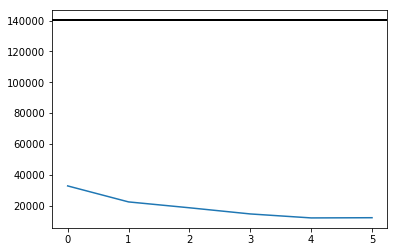

In [47]:
import matplotlib.pyplot as plt
plt.plot(meanMSE_Lingress)
plt.axhline(y=meanMSE_Naive[1], linewidth=2, color='k')
plt.show()

In [74]:
# Let's try making a predction, using 80 blocked sidewalk complaints, 3000 street and sidewalk cleaning complaints
# 50 noise complaints, 1500 complaints from the Mission district, 700 from the Northern district, and 500 from Park.

# The outcome is the predicted number of graffiti complaints for the week.
lm.predict([80,3000,50,1500,700,500])

C:\Users\Andri\Anaconda3\envs\py27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1256.59111741])

## K-nearest neighbors

See information at the beginning of Theory chapter

In [61]:
from sklearn import neighbors
import random
from sklearn.model_selection import train_test_split

pf = df_updated2.copy()

def knn_prediction(n, file_name):
    # the function builds a knn model við n neighbours
    # and returns a csv file under the given file_name
    #file_name should be string, and n should be a integer

    # we only look at private and public grafiti
    graffiti = pf[(pf.Category == 'Graffiti Public Property') | (pf.Category == 'Graffiti Private Property')]

    # for predicting, X stores the values which are used to predict the values of Y
    X = []
    Y = []

    locations = list(graffiti.Point)
    categorys = list(graffiti.Category)
    police_district = list(graffiti["Police District"])
    k = 0 # to ensure that the we pick right category
    for loc in locations:
        # set the lon, lat on the correct format
        if type(loc) != float:
            lat, lon = loc.split(",", 1)
            lat = float(lat.replace("(", ""))
            lon = float(lon.replace(")", ""))
            # check for outliers
            if lat < 90.00:
                if lon < -120:
                    if categorys[k] == 'Graffiti Public Property':
                        Y.append([1, police_district[k]])
                        X.append([lat, lon])
                    elif categorys[k] == 'Graffiti Private Property':
                        Y.append([2,  police_district[k]])
                        X.append([lat, lon])
        k = k+1

    # use hold out to split our dataset, where 30% is test and 70% is training
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)

   
    # make the knn model with the scipy module
    knn=neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted_val = knn.predict(X_test)

    # make dict which stores the name of the district as key, and the num of private and public in list
    #were the first one is public, and second private
    pol_dist = set(police_district)
    zeros = [[0 for col in range(2)] for row in range(len(pol_dist))]
    district_prediction_count = dict(zip(pol_dist, zeros)) 

    # count how many times each class happens in its district
    for val in predicted_val:
        if 'nan' != val[1]: 
            district_prediction_count[val[1]][int(val[0])-1] = district_prediction_count[val[1]][int(val[0])-1] +1 
    
    # change the format of the code so that the csv-file will be nicer to read in the javascript
    districts = []
    public = []
    private = []
    for district in district_prediction_count:
        districts.append(district)
        public.append(district_prediction_count[district][0])
        private.append(district_prediction_count[district][1])


    graffities = {
        'district' :districts ,
        'public': public,
        'private': private
    }        

    file_name = file_name + ".csv"    
    predict_data = pd.DataFrame(graffities)
    #predict_data.to_csv(file_name)
    print "A csv file named: " + file_name + " has been saved in your current working directory"
    
    # calculate the accuracy
    #since its a multiclass calsification both classes need to be correct
    # to be in the true positives in the confusion matrix
    correct_predictions = 0
    for i in range(len(predicted_val)):
        if int(predicted_val[i][0]) == Y_test[i][0] and predicted_val[i][1] == Y_test[i][1]:
            correct_predictions = correct_predictions + 1
    
    print "The prediction of the %s model is %.4f"%(file_name, float(correct_predictions)/ len(Y_test))  
            

knn_prediction(2, "knn2")
knn_prediction(3, "knn3")
knn_prediction(5, "knn5")
knn_prediction(7, "knn7")
knn_prediction(9, "knn9")

A csv file named: knn2.csv has been saved in your current working directory
The prediction of the knn2.csv model is 0.7314
A csv file named: knn3.csv has been saved in your current working directory
The prediction of the knn3.csv model is 0.7457
A csv file named: knn5.csv has been saved in your current working directory
The prediction of the knn5.csv model is 0.7531
A csv file named: knn7.csv has been saved in your current working directory
The prediction of the knn7.csv model is 0.7519
A csv file named: knn9.csv has been saved in your current working directory
The prediction of the knn9.csv model is 0.7530


## Decision Tree

See information about the decision tree at the beginning of the theory chapter

In [69]:
import re

pf = df_updated2.copy()

# we are forecasting category, so we only select observations with our graffiti categorys
df_tree = pf[(pf['Category'] == 'Graffiti Public Property') | (pf['Category'] == 'Graffiti Private Property') ]

#only take cases which are closed
df_tree = df_tree[pf['Status'] == 'Closed']

# get what hour each complaint happens in
df_tree['Complain hour'] = df_tree['Opened'].apply(lambda x: float(x[11:13]))


# change the fomrmat of the dates.. we are calculateing the time it takes to solve a crime
df_tree['Opened'] = df_tree['Opened'].apply(lambda x: x[0:-2] if x[20:22] == "AM" else x[0:11] + str(int(x[11:13])+12) + x[13:-2])
df_tree['Closed'] = df_tree['Closed'].apply(lambda x: x[0:-2] if x[20:22] == "AM" else x[0:11] + str(int(x[11:13])+12) + x[13:-2])
df_tree['Opened'] = df_tree['Opened'].apply(lambda x: x[0:11] + "00" + x[13:19] if x[11:13] == "24" else x[0:19])
df_tree['Closed'] = df_tree['Closed'].apply(lambda x: x[0:11] + "00" + x[13:19] if x[11:13] == "24" else x[0:19])

df_tree['Opened'] = df_tree['Opened'].apply(lambda x: re.sub("/", "-", x))
df_tree['Closed'] = df_tree['Closed'].apply(lambda x: re.sub("/", "-", x))

# get the seconds between open and close cases
df_tree['Closed'] = pd.to_datetime(df_tree['Closed'], format='%m-%d-%Y %H:%M:%S')
df_tree['Opened'] = pd.to_datetime(df_tree['Opened'], format='%m-%d-%Y %H:%M:%S')
df_tree['Process Seconds'] = (df_tree['Opened'] - df_tree['Closed']).dt.seconds#.astype('timedelta64[s]')


#delte column that we dont need
df_tree = df_tree.drop('Status', 1)
df_tree = df_tree.drop('Neighborhood', 1)
df_tree = df_tree.drop('Supervisor District', 1)
df_tree = df_tree.drop('Opened', 1)
df_tree = df_tree.drop('Closed', 1)

#delete values that are nan
df_tree = df_tree[pd.notnull(df_tree['Point'])]
df_tree = df_tree[pd.notnull(df_tree['Police District'])]

# get lat and lon in seperate columns
df_tree['Lat'] = df_tree['Point'].apply(lambda x: float(x[x.find("(")+1:x.find(",")]))
df_tree['Lon'] = df_tree['Point'].apply(lambda x: float(x[x.find(",")+1:x.find(")")]))
df_tree = df_tree.drop('Point', 1) # we dont need POINTS any more..

#one hot encoding for category since, decision tree dose not take string
police_districts = set(list(df_tree['Police District']))
for district in police_districts:
    df_tree[district] = df_tree.apply(lambda x: 1 if x["Police District"] ==  district else 0, axis = 1 )

### HERE WE START FORCASTING

from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import KFold

attributes = ["Police District", "Complain hour", "Lat", "Lon"] # add one by on to the model, in correct order
used_attri = [] # the values which are used in the model

X = []
y= list(df_tree["Category"])

df_tree.values.tolist()
#the forcast matrix has the same length as the one we are forcasting for
for attri in attributes:
    # extract what elements we use to build our decsion tree
    # the idea is that in each itration we add one new category to current sol
    # and see if we get a better sollution (police district uses k hot coding..
    #we add all the rows at the same time to the model)
    if attri == "Police District":
        p_district = list(set(list(df_tree["Police District"])))
        used_attri = used_attri + p_district #concate the arrays... get all the districts inn
    else:
        used_attri.append(attri)
        
    df_X = df_tree[used_attri]
    X = df_X.values.tolist()
  
    # now use the decsison tree
    X_train = []
    X_test = []

    y_train = []
    y_test = []

    kf = KFold(n_splits=2)
    scores = []
    for train, test in kf.split(X):
        #train and test are indexes of the train and test values
        for i in train:
            X_train.append(X[i])
            y_train.append(y[i])
        for i in test:
            X_test.append(X[i])
            y_test.append(y[i])
    
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(X_train,y_train)
        scores.append(clf.score(X_test, y_test))
    
    print " %s added to the data, we get score of %.4f"%(attri, np.average(scores)) 



# lets try the model, by forcasting somthing..
["Process Seconds", "Police District", "Complain hour", "Lat", "Lon"]
tests = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 37.764644, -122.426927], #............Mission, 3clock
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 10, 37.787546, -122.421760], #..................Northern 10 clock
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,14, 37.774153, -122.445216], #.................. Park   14 clock
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 17, 37.764622, -122.492386], #....................Taraval 17 clock
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 37.793518, -122.407930], #....................Central 17 clock
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 17, 37.764644, -122.426927] #....................Mission 17 clock
]
print "the predicted classes are:"
print ""
print clf.predict(tests)


# guess the most comon.. so we can see how good our model really is
public = 0
private = 0
for att in y:
    if att == 'Graffiti Public Property':
        public = public + 1
    else:
        private = private +1
        

print "guessing most comon gives accuracy of %.4f"%(max(public,private)/float(len(y)))

C:\Users\Andri\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


 Police District added to the data, we get score of 0.6210
 Complain hour added to the data, we get score of 0.6253
 Lat added to the data, we get score of 0.7653
 Lon added to the data, we get score of 0.7930
the predicted classes are:

['Graffiti Private Property' 'Graffiti Public Property'
 'Graffiti Public Property' 'Graffiti Private Property'
 'Graffiti Private Property' 'Graffiti Public Property']
guessing most comon gives accuracy of 0.5970


## Regression tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import KFold

#Regression tree only takes numbers, so 1 if its Graffiti Public Property, 0 otherwise (Graffiti Private Property)
df_tree["cate"] = df_tree.apply(lambda x: 1 if x["Category"] ==  "Graffiti Public Property" else 0, axis = 1 )

attributes = ["cate", "Police District", "Complain hour", "Lat", "Lon"]
used_attri = [] # the values which are used in the model

X = []
y= list(df_tree["Process Seconds"])

df_tree.values.tolist()
#the forcast matrix has the same length as the one we are forcasting for
for attri in attributes:
    # extract what elements we use to build our decsion tree
    # the idea is that in each itration we add one new category to current sol
    # and see if we get a better sollution (police district uses k hot coding..
    #we add all the rows at the same time to the model)
    if attri == "Police District":
        p_district = list(set(list(df_tree["Police District"])))
        used_attri = used_attri + p_district #concate the arrays... get all the districts inn
    else:
        used_attri.append(attri)
        
    df_X = df_tree[used_attri]
    X = df_X.values.tolist()
  
    # now use the regression tree
    X_train = []
    X_test = []

    y_train = []
    y_test = []

    kf = KFold(n_splits=10)
    scores = []
    total_squears_prediction = []
    total_squears_for_mean = []
    for train, test in kf.split(X):
        #train and test are indexes of the train and test values
        for i in train:
            X_train.append(X[i])
            y_train.append(y[i])
        for i in test:
            X_test.append(X[i])
            y_test.append(y[i])
    
        regress_tree = DecisionTreeRegressor(random_state=0)
        regress_tree.fit(X_train,y_train)
        
        # compeare R^2 for guessing always the mean and predicting
        predictions = regress_tree.predict(X_test)
        squers_prediction = []
        squers_mean = []
        mean = np.mean(X_train)
        for i in range(len(predictions)):
            squers_prediction.append((y_test[i] - predictions[i])**2)
            squers_mean.append((y_test[i] - mean)**2)
        
        total_squears_prediction.append(np.mean(squers_prediction))
        total_squears_for_mean.append(np.mean(squers_mean))
        
        #scores.append(regress_tree.score(X_test, y_test))
    
    print " %s added to the data, we get score of %.4f and guessing mean gives %.4f"%(attri, np.average(total_squears_prediction), np.average(total_squears_for_mean) ) 
    print " R^square_Prediction/ R^square_mean is %.4f"%(np.average(total_squears_prediction)/np.average(total_squears_for_mean))

 cate added to the data, we get score of 722375992.0779 and guessing mean gives 2584820414.7063
 R^square_Prediction/ R^square_mean is 0.2795
 Police District added to the data, we get score of 720739117.6854 and guessing mean gives 2584859154.2452
 R^square_Prediction/ R^square_mean is 0.2788
 Complain hour added to the data, we get score of 705377355.9299 and guessing mean gives 2584812287.2274
 R^square_Prediction/ R^square_mean is 0.2729
 Lat added to the data, we get score of 438603676.4274 and guessing mean gives 2584566119.9446
 R^square_Prediction/ R^square_mean is 0.1697
 Lon added to the data, we get score of 408860077.0786 and guessing mean gives 2585342753.3323
 R^square_Prediction/ R^square_mean is 0.1581




______________________
Now let's test the regression tree by making a few predictions...

In [70]:
tests = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 37.764641, -122.426930, 1], #............ Mission, 6clock, public
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 10, 37.787546, -122.421760,0], #.................. Northern 10 clock, private
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,12, 37.774153, -122.445216,0], #.................. weeks Park   12 clock, private
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 17, 37.764620, -122.492383,1], #....................  Taraval 17 clock, public
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 37.793516, -122.407931,1], #....................  Central 17 clock, public
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 17, 37.764641, -122.426929,1] #....................  Mission 17 clock, public
]

regress_tree.predict(tests)

array([ 36098.,  36098.,  51506.,  36098.,  50617.,  36098.])

## K-means

In [75]:
from sklearn.cluster import KMeans
import json

df_kmeans = df_tree[["Lat", "Lon"]]
df_kmeans

def K_MEANS(k):
    X = df_kmeans.values.tolist()
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(X)
    labels =  k_means.labels_.tolist()
    centroid = k_means.cluster_centers_
    
    centroid_lat = []
    centroid_lon = []
    for cordinates in centroid:
        centroid_lat.append(cordinates[0])
        centroid_lon.append(cordinates[1])
    
    # since the dataset is very big for lat and long values
    # the d3 visualization had a hard time plotting upp aproximatly 31064 points
    # so we only select the first 7500 points for visualization.. but calculate the true centroid
    k_mean_attributes ={
     'centroid_lat': centroid_lat,
     'centroid_lon': centroid_lon,
     'labels': labels[0:7500],
     'lat':list(df_kmeans["Lat"][0:7500]),
     'lon':list(df_kmeans["Lon"][0:7500])
    }
    k_mean_attributes = json.dumps(k_mean_attributes)
    file_name = "kmeans_" +str(k)+ ".json"
    with open(file_name, 'w') as outfile:
        json.dump(k_mean_attributes, outfile)

K_MEANS(2)
K_MEANS(3)
K_MEANS(5)
K_MEANS(7)
K_MEANS(9)

# 4. Visualizations
__________
* **Explain the visualizations you've chosen.**
* **Why are they right for the story you want to tell?**
________

Visualization can be seen in sections **2. Basic Stats** and **3. Theory - Machine Learning**. Since the questions for this section have been answered in the previous sections for the most part, this chapter will provide a summary of this information. More detailed information about specific models can be found in sections 2 and 3.

**Basic Statistics:** The plots in this section are intended to give a broad overview of the data, the distribution and how relevant attributes/categories relate to one another.
* **Graffiti Complaints as Time Series:** Here, the total graffiti complaints filed in a month are plotted in the form of a time series. This gives the user a good idea of what the distrubtion of complaints over the whole time period looks like and it is easy to spot trends and anomalies in the data. This also shows how busy the city is in processing complaints.
* **Average resolve times by districts:** This shows how long it takes on average to process complaints by police districts. If there is a big difference between the districts it would suggest that the service level would need to be upped in some of the districts.
* **Correlation between graffiti cases and other categories:** The correlation between graffiti complaints and other complaints is calculated and dislayed visiually. With it in mind that correlation does not necessarily imply causation, this gives an idea of how the categories are connected. High correlation means that a high numbers of complaints one category suggest high numbers in the other one, and the opposite is of course true for negative correlation.
* **Percentage of unresolved cases by district:** The percentage of unresolved cases are calculated by dividing open cases with total cases. Just like avergae resolve times, this is a good indicator of service level in each of the districts. Most cases are solved relatively quickly, but the dataset contains a big number of outliers in terms of resolve time, and some remain unresolved for a long time. Districts with a high percentage of unresolved cases suggest that service level needs to be upped.
* **Total number of graffiti complaints by district:** This one is probably fairly self-explanatory. Here we display the total number of graffiti complaints in each police district. This provides a nice overview of how the cases are distributed accross the different districts. 
* **Interactive barplot:** The interactive barplot is displayed on the website. It shows the total number of complaints by hour, giving the user an idea of what the distribution is like the day. The user is able to select districts and to juggle between viewing only private or only public property cases, as well as the total number of cases.

**Machine Learning:**
* **The KNN model** classifies data points based on their K-nearest neighbors by district and whether they relate to public or private properties. The results will be displayed on an intereactive map of San Francisco, divided by police districts. Each district will be colored based on the the ratio the number of public vs private property cases. The user will be able to toggle between different numbers of K to see how it affects the predictions. The user will be able to see the real values vs the predicted values for each district by hovering over it on the map. This is useful in terms of getting oversight with the map. The results of the model are also useful so that the city can know approximately how many new cases, and of which type, are going to appear. This way will know how much service will be needed in each district and increases its ability to respond to requests quickly.

**Other:** Other visualizations used in the project (the website) that help "telling the story"
* **Graffiti locator:** Pictures of selected interesting graffiti (not all graffiti is bad and ugly) are displayed on the website, where the user can hover over the pictures to see where they are located on a map in San Francisco, or click the image to be redirected to the exact location on google maps, if they are so inclined.
* **The counter:** Shows the user the total amount of graffiti for private and public properties, as well as the total amount. It starts counting from zero when the user opens the site, until it reaches the current number of cases. This gives the reader an nice overview of the quantity of cases.

# 5. Discussion. Think critically about your creation

* **What went well?**
* **What is still missing? What could be improved?, Why?**

**Went well:**
We were able to experiment a lot with the website and were happy with the final outcome in terms of what it looked like. We were happy with the outcome of the basic statistics section and thought that the KNN and K-nearest neighbor models turned out nicely.

**Improve:** In retrospect, the decisions about what to predict with the machine learning tools is something that we could have though through more carefully. We thought that we could have improved upon our "story telling" as well.

